# Project 3: Sustainability Regression OPIM 5671 

##Team - 4

* Aishwary Bodhale
* Himanshu Dubey
* Karishma Ramchandani
* Nandan Adlakha
* Rachel Kallely
* Sahibpreet Singh

![pic](https://www.universityofcalifornia.edu/sites/default/files/longform/thumbnails/co2-clip-2.gif) 

![pic2](https://i.redd.it/tqc26wtcoea71.gif)

Sources: https://i.redd.it/tqc26wtcoea71.gif , https://www.universityofcalifornia.edu/sites/default/files/longform/thumbnails/co2-clip-2.gif


## Data Cleansing and Preparation

### Import libraries

We will need to install a solver to solve a mixed-integer nonlinear program (!) - you can just run this code to get the `bonmin` solver. More detail here:

* https://projects.coin-or.org/Bonmin/browser/stable/0.1/Bonmin/doc/BONMIN_UsersManual.pdf?format=raw

In [ ]:
# import modules
%matplotlib inline
import pandas as pd
import numpy as np
from pylab import * 
import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("bonmin") or os.path.isfile("bonmin")):
    if "google.colab" in sys.modules:
        !wget -N -q "https://ampl.com/dl/open/bonmin/bonmin-linux64.zip"
        !unzip -o -q bonmin-linux64
        # !apt-get install -y -qq mindtpy
    else:
        try:
            !conda install -c conda-forge ipopt
        except:
            pass

assert(shutil.which("bonmin") or os.path.isfile("bonmin"))

from pyomo.environ import *

     |████████████████████████████████| 9.2 MB 5.1 MB/s 
     |████████████████████████████████| 49 kB 5.0 MB/s 


### Importing the Data and Required Modules

In [ ]:
#Importing Modules
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Extracting data from the googlr spreadsheet
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/17FAxj883YNL7He7rC6bjjsS2IAR1SsMwmZ0vuQAAEvs/edit#gid=2083552486')

In [ ]:
#Original excel file has 3 sheets, we are extracting "Data" sheet here
sheet1 = wb.worksheet('Data')

In [ ]:
#Fetching all the values from the sheet into a variable
data1 = sheet1.get_all_values()

In [ ]:
#Original excel file has 3 sheets, we are extracting "Series" sheet here
sheet2 = wb.worksheet('Series')

In [ ]:
#Fetching all the values from the sheet into a variable
data2 = sheet2.get_all_values()

In [ ]:
#Converting it into the Dataframe
df_Data = pd.DataFrame(data1)
df_Data.columns = df_Data.iloc[0]
df_Data = df_Data.iloc[1:]

In [ ]:
#Converting it into the Dataframe
df_Series = pd.DataFrame(data2)
df_Series.columns = df_Series.iloc[0]
df_Series = df_Series.iloc[1:]

In [ ]:
df_Data.head() #printing the data head from "Data" sheet

,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
1,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,29.57,..,..,..,..,..,..,..,..,..,29.57,..,..,..,..,..,..,..,..,..,..,..
2,ADO,Andorra,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.00,..,..,..,..,..,..,..,..,..,0.00,..,..,..,..,..,..,..,..,..,..,..
3,AFG,Afghanistan,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.00,..,..,..,..,..,..,..,..,..,0.00,..,..,..,..,..,..,..,..,..,..,..
4,AGO,Angola,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.21,..,..,..,..,..,..,..,..,..,0.21,..,..,..,..,..,..,..,..,..,..,..
5,ALB,Albania,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,4.97,..,..,..,..,..,..,..,..,..,4.97,..,..,..,..,..,..,..,..,..,..,..


In [ ]:
df_Series.head()#printing the data head from "Series" sheet

,Series code,Series name,Scale,Decimals,Order,Topic,Definition,Source
1,SP.POP.TOTL,Population,0,0,1,Size of the economy,Population includes all residents who are pres...,(1) United Nations Population Division. 2011. ...
2,SP.POP.GROW,Population growth (annual %),0,1,2,Size of the economy,Annual population growth rate for year t is th...,Derived from total population. Population sour...
3,NY.GDP.MKTP.CD,GDP ($),0,0,3,Size of the economy,GDP is gross domestic product and measures the...,"World Bank national accounts data, and OECD Na..."
4,NY.GNP.PCAP.CD,GNI per capita (Atlas $),0,0,4,Size of the economy,"GNI per capita is the gross national income, c...","World Bank national accounts data, and OECD Na..."
5,EN.CLC.MMDT.C,"Average daily min/max temperature (1961-1990, ...",Text,Text,5,Climate,Average daily min/max temperature are the mini...,"Mitchell, T.D., Carter, T.R., Jones, P.D., Hul..."


### Merging the two Dataframes to create the Master Dataframe

In [ ]:
#Merging the dataframes from Data and Series worksheets
df = pd.merge(df_Data, df_Series, how="inner", on=["Series code"])

In [ ]:
df.head()

,Country code,Country name,Series code,Series name_x,SCALE,Decimals_x,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,Series name_y,Scale,Decimals_y,Order,Topic,Definition,Source
0,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,29.57,..,..,..,..,..,..,..,..,..,29.57,..,..,..,..,..,..,..,..,..,..,..,Land area below 5m (% of land area),0,1,11,Exposure to impacts,Land area below 5m is the percentage of total ...,Center for International Earth Science Informa...
1,ADO,Andorra,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.00,..,..,..,..,..,..,..,..,..,0.00,..,..,..,..,..,..,..,..,..,..,..,Land area below 5m (% of land area),0,1,11,Exposure to impacts,Land area below 5m is the percentage of total ...,Center for International Earth Science Informa...
2,AFG,Afghanistan,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.00,..,..,..,..,..,..,..,..,..,0.00,..,..,..,..,..,..,..,..,..,..,..,Land area below 5m (% of land area),0,1,11,Exposure to impacts,Land area below 5m is the percentage of total ...,Center for International Earth Science Informa...
3,AGO,Angola,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.21,..,..,..,..,..,..,..,..,..,0.21,..,..,..,..,..,..,..,..,..,..,..,Land area below 5m (% of land area),0,1,11,Exposure to impacts,Land area below 5m is the percentage of total ...,Center for International Earth Science Informa...
4,ALB,Albania,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,4.97,..,..,..,..,..,..,..,..,..,4.97,..,..,..,..,..,..,..,..,..,..,..,Land area below 5m (% of land area),0,1,11,Exposure to impacts,Land area below 5m is the percentage of total ...,Center for International Earth Science Informa...


In [ ]:
df.shape

#there are 13512 rows and 35 columns in the new dataset

(13512, 35)

In [ ]:
df.dtypes
#Checking the data types

0
Country code     object
Country name     object
Series code      object
Series name_x    object
SCALE            object
Decimals_x       object
1990             object
1991             object
1992             object
1993             object
1994             object
1995             object
1996             object
1997             object
1998             object
1999             object
2000             object
2001             object
2002             object
2003             object
2004             object
2005             object
2006             object
2007             object
2008             object
2009             object
2010             object
2011             object
Series name_y    object
Scale            object
Decimals_y       object
Order            object
Topic            object
Definition       object
Source           object
dtype: object

In [ ]:

#Converting the datatype from object to numeric since majority of the datatype were in float

df['1990'] = pd.to_numeric(df['1990'], errors='coerce')
df['1991'] = pd.to_numeric(df['1991'], errors='coerce')
df['1992'] = pd.to_numeric(df['1992'], errors='coerce')
df['1993'] = pd.to_numeric(df['1993'], errors='coerce')
df['1994'] = pd.to_numeric(df['1994'], errors='coerce')
df['1995'] = pd.to_numeric(df['1995'], errors='coerce')
df['1996'] = pd.to_numeric(df['1996'], errors='coerce')
df['1997'] = pd.to_numeric(df['1997'], errors='coerce')
df['1998'] = pd.to_numeric(df['1998'], errors='coerce')
df['1999'] = pd.to_numeric(df['1999'], errors='coerce')
df['2000'] = pd.to_numeric(df['2000'], errors='coerce')
df['2001'] = pd.to_numeric(df['2001'], errors='coerce')
df['2002'] = pd.to_numeric(df['2002'], errors='coerce')
df['2003'] = pd.to_numeric(df['2003'], errors='coerce')
df['2004'] = pd.to_numeric(df['2004'], errors='coerce')
df['2005'] = pd.to_numeric(df['2005'], errors='coerce')
df['2006'] = pd.to_numeric(df['2006'], errors='coerce')
df['2007'] = pd.to_numeric(df['2007'], errors='coerce')
df['2008'] = pd.to_numeric(df['2008'], errors='coerce')
df['2009'] = pd.to_numeric(df['2009'], errors='coerce')
df['2010'] = pd.to_numeric(df['2010'], errors='coerce')
df['2011'] = pd.to_numeric(df['2011'], errors='coerce')


### Subset columns of interest
Just the years 1990 - 2011.

In [ ]:
#Creating a separate dataframe for the years so as to compute the the average across the Years

list_years = range(1990,2012)
#years = df[list_years]
years = df[['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011']]
years.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,29.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Compute the average across columns
Next, compute the row-wise average ignoring NaNs (you will need to use axis=1 to take the average across all columns!)
Create a new column in df with the average values

In [ ]:
df['average']= years.mean(axis=1)
df.head()

#Creating a column computing average considering non null values in the years column and adding it to the main data

,Country code,Country name,Series code,Series name_x,SCALE,Decimals_x,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,Series name_y,Scale,Decimals_y,Order,Topic,Definition,Source,average
0,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,29.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Land area below 5m (% of land area),0,1,11,Exposure to impacts,Land area below 5m is the percentage of total ...,Center for International Earth Science Informa...,29.57
1,ADO,Andorra,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Land area below 5m (% of land area),0,1,11,Exposure to impacts,Land area below 5m is the percentage of total ...,Center for International Earth Science Informa...,0.00
2,AFG,Afghanistan,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Land area below 5m (% of land area),0,1,11,Exposure to impacts,Land area below 5m is the percentage of total ...,Center for International Earth Science Informa...,0.00
3,AGO,Angola,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Land area below 5m (% of land area),0,1,11,Exposure to impacts,Land area below 5m is the percentage of total ...,Center for International Earth Science Informa...,0.21
4,ALB,Albania,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,4.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Land area below 5m (% of land area),0,1,11,Exposure to impacts,Land area below 5m is the percentage of total ...,Center for International Earth Science Informa...,4.97


In [ ]:
df.dtypes
#Checking the datatype

0
Country code      object
Country name      object
Series code       object
Series name_x     object
SCALE             object
Decimals_x        object
1990             float64
1991             float64
1992             float64
1993             float64
1994             float64
1995             float64
1996             float64
1997             float64
1998             float64
1999             float64
2000             float64
2001             float64
2002             float64
2003             float64
2004             float64
2005             float64
2006             float64
2007             float64
2008             float64
2009             float64
2010             float64
2011             float64
Series name_y     object
Scale             object
Decimals_y        object
Order             object
Topic             object
Definition        object
Source            object
average          float64
dtype: object

### Changing Data Types of the other numeric columns

In [ ]:
df['SCALE'] = pd.to_numeric(df['SCALE'], errors='coerce')
df['Scale'] = pd.to_numeric(df['Scale'], errors='coerce')
df['Decimals_x'] = pd.to_numeric(df['Decimals_x'], errors='coerce')
df['Decimals_y'] = pd.to_numeric(df['Decimals_y'], errors='coerce')
df['Order'] = pd.to_numeric(df['Order'], errors='coerce')
#Changed the datatype to numeric 

### Drop repetive columns
Students can also opt to rename some columns.

In [ ]:
#Removed the years column since we added the Average Column 
df=df.drop(['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011'],axis=1)
df=df.drop(["Series name_y","Decimals_y"],axis=1)

In [ ]:
df = df.drop('SCALE',axis=1)
#There were duplicate column of the Scale variable

In [ ]:
df.columns
#Checking the column names that are left after cleaning the dataset

Index(['Country code', 'Country name', 'Series code', 'Series name_x',
       'Decimals_x', 'Scale', 'Order', 'Topic', 'Definition', 'Source',
       'average'],
      dtype='object', name=0)

In [ ]:
df['Series name'] = df['Series name_x']
#renaming 'Series name_x' to 'Series_name'

In [ ]:
df['Decimals'] = df['Decimals_x']
#renaming 'Decimals_x' to 'Decimals'

In [ ]:
df=df.drop(["Series name_x","Decimals_x"],axis=1)
#Dropped the old columns

In [ ]:
df.columns
#checking the column list again

Index(['Country code', 'Country name', 'Series code', 'Scale', 'Order',
       'Topic', 'Definition', 'Source', 'average', 'Series name', 'Decimals'],
      dtype='object', name=0)

In [ ]:
df.head()

,Country code,Country name,Series code,Scale,Order,Topic,Definition,Source,average,Series name,Decimals
0,ABW,Aruba,AG.LND.EL5M.ZS,0.0,11,Exposure to impacts,Land area below 5m is the percentage of total ...,Center for International Earth Science Informa...,29.57,Land area below 5m (% of land area),1.0
1,ADO,Andorra,AG.LND.EL5M.ZS,0.0,11,Exposure to impacts,Land area below 5m is the percentage of total ...,Center for International Earth Science Informa...,0.00,Land area below 5m (% of land area),1.0
2,AFG,Afghanistan,AG.LND.EL5M.ZS,0.0,11,Exposure to impacts,Land area below 5m is the percentage of total ...,Center for International Earth Science Informa...,0.00,Land area below 5m (% of land area),1.0
3,AGO,Angola,AG.LND.EL5M.ZS,0.0,11,Exposure to impacts,Land area below 5m is the percentage of total ...,Center for International Earth Science Informa...,0.21,Land area below 5m (% of land area),1.0
4,ALB,Albania,AG.LND.EL5M.ZS,0.0,11,Exposure to impacts,Land area below 5m is the percentage of total ...,Center for International Earth Science Informa...,4.97,Land area below 5m (% of land area),1.0


In [ ]:
df.info
#There are 13512 rows and 11 columns present in the dataset

<bound method DataFrame.info of 0     Country code  ... Decimals
0              ABW  ...      1.0
1              ADO  ...      1.0
2              AFG  ...      1.0
3              AGO  ...      1.0
4              ALB  ...      1.0
...            ...  ...      ...
13507          YEM  ...      0.0
13508          ZAF  ...      0.0
13509          ZAR  ...      0.0
13510          ZMB  ...      0.0
13511          ZWE  ...      0.0

[13512 rows x 11 columns]>

In [ ]:
print(df.shape)

(13512, 11)


In [ ]:
print(df.shape) 
df.dropna(inplace=True)
print(df.shape) 

#We have droped the null values from the dataset and we are left with 7499 rows

(13512, 11)
(7499, 11)


### Fetching the Specific countries that have been assigned to our team

We will filter the data by the list of countries that have been assigned to us!

In [ ]:
my_countries=['GBR','GEO','GRC','HRV','HUN','IND']
#Considering the countries that has been assigned to our team
df=df[df["Country code"].isin(my_countries)] #filtering by countries and checkiing whether it is in the list
df.head()

,Country code,Country name,Series code,Scale,Order,Topic,Definition,Source,average,Series name,Decimals
71,GBR,United Kingdom,AG.LND.EL5M.ZS,0.0,11,Exposure to impacts,Land area below 5m is the percentage of total ...,Center for International Earth Science Informa...,7.61,Land area below 5m (% of land area),1.0
72,GEO,Georgia,AG.LND.EL5M.ZS,0.0,11,Exposure to impacts,Land area below 5m is the percentage of total ...,Center for International Earth Science Informa...,1.43,Land area below 5m (% of land area),1.0
79,GRC,Greece,AG.LND.EL5M.ZS,0.0,11,Exposure to impacts,Land area below 5m is the percentage of total ...,Center for International Earth Science Informa...,6.33,Land area below 5m (% of land area),1.0
88,HRV,Croatia,AG.LND.EL5M.ZS,0.0,11,Exposure to impacts,Land area below 5m is the percentage of total ...,Center for International Earth Science Informa...,3.03,Land area below 5m (% of land area),1.0
90,HUN,Hungary,AG.LND.EL5M.ZS,0.0,11,Exposure to impacts,Land area below 5m is the percentage of total ...,Center for International Earth Science Informa...,0.00,Land area below 5m (% of land area),1.0


In [ ]:
# Resetting the Index
df = df.reset_index(drop=True)
df.head()

,Country code,Country name,Series code,Scale,Order,Topic,Definition,Source,average,Series name,Decimals
0,GBR,United Kingdom,AG.LND.EL5M.ZS,0.0,11,Exposure to impacts,Land area below 5m is the percentage of total ...,Center for International Earth Science Informa...,7.61,Land area below 5m (% of land area),1.0
1,GEO,Georgia,AG.LND.EL5M.ZS,0.0,11,Exposure to impacts,Land area below 5m is the percentage of total ...,Center for International Earth Science Informa...,1.43,Land area below 5m (% of land area),1.0
2,GRC,Greece,AG.LND.EL5M.ZS,0.0,11,Exposure to impacts,Land area below 5m is the percentage of total ...,Center for International Earth Science Informa...,6.33,Land area below 5m (% of land area),1.0
3,HRV,Croatia,AG.LND.EL5M.ZS,0.0,11,Exposure to impacts,Land area below 5m is the percentage of total ...,Center for International Earth Science Informa...,3.03,Land area below 5m (% of land area),1.0
4,HUN,Hungary,AG.LND.EL5M.ZS,0.0,11,Exposure to impacts,Land area below 5m is the percentage of total ...,Center for International Earth Science Informa...,0.00,Land area below 5m (% of land area),1.0


In [ ]:
df.shape
#Now we are left with only 224 rows and 11 columns that we will use in our model

(224, 11)

### Eliminate series that do not appear for all countries

The data is a bit messed because some series appear for some countries and not for the others. We need a common set of variables for all countries! Therefore, we need to identify the set of series for which we have data for all countries.


In [ ]:
df.groupby(['Series name']).count() #using groupby() to see how many variables have 6 variables (IMP)

,Country code,Country name,Series code,Scale,Order,Topic,Definition,Source,average,Decimals
Series name,,,,,,,,,,
Access to electricity (% of total population),1,1,1,1,1,1,1,1,1,1
Access to improved sanitation (% of total pop.),6,6,6,6,6,6,6,6,6,6
Access to improved water source (% of total pop.),6,6,6,6,6,6,6,6,6,6
Agricultural land under irrigation (% of total ag. land),5,5,5,5,5,5,5,5,5,5
Annual freshwater withdrawals (% of internal resources),5,5,5,5,5,5,5,5,5,5
CO2 emissions per capita (metric tons),6,6,6,6,6,6,6,6,6,6
"CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)",6,6,6,6,6,6,6,6,6,6
"CO2 emissions, total (KtCO2)",6,6,6,6,6,6,6,6,6,6
Cereal yield (kg per hectare),6,6,6,6,6,6,6,6,6,6


We see above that some variables appear 1 time vs. 6 times. We only want variables that appear 6 times since they are common to all countries. We will need to retrieve the names of the variables that appear six times and then use `isin()` to subset relevant rows from `df`.

In [ ]:
tmp=df.groupby(['Series name']).count()

Return the variables where there are at least 6 rows. Most groups should have around 30 rows at this point.

In [ ]:
tmp

,Country code,Country name,Series code,Scale,Order,Topic,Definition,Source,average,Decimals
Series name,,,,,,,,,,
Access to electricity (% of total population),1,1,1,1,1,1,1,1,1,1
Access to improved sanitation (% of total pop.),6,6,6,6,6,6,6,6,6,6
Access to improved water source (% of total pop.),6,6,6,6,6,6,6,6,6,6
Agricultural land under irrigation (% of total ag. land),5,5,5,5,5,5,5,5,5,5
Annual freshwater withdrawals (% of internal resources),5,5,5,5,5,5,5,5,5,5
CO2 emissions per capita (metric tons),6,6,6,6,6,6,6,6,6,6
"CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)",6,6,6,6,6,6,6,6,6,6
"CO2 emissions, total (KtCO2)",6,6,6,6,6,6,6,6,6,6
Cereal yield (kg per hectare),6,6,6,6,6,6,6,6,6,6


In [ ]:
tmp=tmp[tmp['average']==6] #Considering dataframe in which series name appear for all 6 countries

We will create a new variable called shared_list which is the index of tmp (our variables that have at least 6 occurences.)

Now simply subset the rows from `df` that are `isin()` the shared list! 

In [ ]:
shared_list=tmp.index
shared_list

df = df[df["Series name"].isin(shared_list)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 223
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country code  174 non-null    object 
 1   Country name  174 non-null    object 
 2   Series code   174 non-null    object 
 3   Scale         174 non-null    float64
 4   Order         174 non-null    int64  
 5   Topic         174 non-null    object 
 6   Definition    174 non-null    object 
 7   Source        174 non-null    object 
 8   average       174 non-null    float64
 9   Series name   174 non-null    object 
 10  Decimals      174 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 16.3+ KB


We have 174 rows across a few different `df['Topic']`. Run `df.unique()` or `df.value_counts()` to see how many topics you have available to you.

In [ ]:
df["Topic"].unique() #Checking how many unique topics we have

array(['Exposure to impacts', 'Resilience',
       'GHG emissions and energy use', 'Size of the economy'],
      dtype=object)

### Subset rows that don't have Topic == GHG emissions and energy use
You should have much less rows now - somewhere between 100 and 120 depending on which countries you use.

We will make a copy of `df` and call it `tmp`, then we will subset rows where `tmp[tmp['Topic']!='GHG emissions and energy use']`

In [ ]:
tmp=df
tmp=tmp[tmp['Topic']!='GHG emmission and energy use'] #removing all the series associated with this topic
tmp.shape

(174, 11)

### Creating dictionary with key = (Country code, variable name) and value = tmp['average']

This was a bit tricky to do a key based on two values. We will use `zip()` values together to make a tuple (reference https://www.w3schools.com/python/ref_func_zip.asp).

In [ ]:
# this makes your key
x1 = zip(tmp["Country code"], tmp["Series code"])
print(list(x1))

[('GBR', 'AG.LND.EL5M.ZS'), ('GEO', 'AG.LND.EL5M.ZS'), ('GRC', 'AG.LND.EL5M.ZS'), ('HRV', 'AG.LND.EL5M.ZS'), ('HUN', 'AG.LND.EL5M.ZS'), ('IND', 'AG.LND.EL5M.ZS'), ('GBR', 'AG.YLD.CREL.KG'), ('GEO', 'AG.YLD.CREL.KG'), ('GRC', 'AG.YLD.CREL.KG'), ('HRV', 'AG.YLD.CREL.KG'), ('HUN', 'AG.YLD.CREL.KG'), ('IND', 'AG.YLD.CREL.KG'), ('GBR', 'BX.KLT.DINV.WD.GD.ZS'), ('GEO', 'BX.KLT.DINV.WD.GD.ZS'), ('GRC', 'BX.KLT.DINV.WD.GD.ZS'), ('HRV', 'BX.KLT.DINV.WD.GD.ZS'), ('HUN', 'BX.KLT.DINV.WD.GD.ZS'), ('IND', 'BX.KLT.DINV.WD.GD.ZS'), ('GBR', 'EG.USE.COMM.GD.PP.KD'), ('GEO', 'EG.USE.COMM.GD.PP.KD'), ('GRC', 'EG.USE.COMM.GD.PP.KD'), ('HRV', 'EG.USE.COMM.GD.PP.KD'), ('HUN', 'EG.USE.COMM.GD.PP.KD'), ('IND', 'EG.USE.COMM.GD.PP.KD'), ('GBR', 'EG.USE.PCAP.KG.OE'), ('GEO', 'EG.USE.PCAP.KG.OE'), ('GRC', 'EG.USE.PCAP.KG.OE'), ('HRV', 'EG.USE.PCAP.KG.OE'), ('HUN', 'EG.USE.PCAP.KG.OE'), ('IND', 'EG.USE.PCAP.KG.OE'), ('GBR', 'EN.ATM.CO2E.KT'), ('GEO', 'EN.ATM.CO2E.KT'), ('GRC', 'EN.ATM.CO2E.KT'), ('HRV', 'EN.ATM.CO

In [ ]:
# this makes your key value
x1 = zip(zip(tmp["Country code"],tmp["Series code"]),tmp['average'])
print(list(x1))

[(('GBR', 'AG.LND.EL5M.ZS'), 7.61), (('GEO', 'AG.LND.EL5M.ZS'), 1.43), (('GRC', 'AG.LND.EL5M.ZS'), 6.33), (('HRV', 'AG.LND.EL5M.ZS'), 3.03), (('HUN', 'AG.LND.EL5M.ZS'), 0.0), (('IND', 'AG.LND.EL5M.ZS'), 1.35), (('GBR', 'AG.YLD.CREL.KG'), 6836.414999999999), (('GEO', 'AG.YLD.CREL.KG'), 1967.9944444444445), (('GRC', 'AG.YLD.CREL.KG'), 3813.34), (('HRV', 'AG.YLD.CREL.KG'), 4768.622222222223), (('HUN', 'AG.YLD.CREL.KG'), 4421.1900000000005), (('IND', 'AG.YLD.CREL.KG'), 2273.2650000000003), (('GBR', 'BX.KLT.DINV.WD.GD.ZS'), 3.566190476190476), (('GEO', 'BX.KLT.DINV.WD.GD.ZS'), 7.857857142857143), (('GRC', 'BX.KLT.DINV.WD.GD.ZS'), 0.8684999999999998), (('HRV', 'BX.KLT.DINV.WD.GD.ZS'), 3.9484210526315793), (('HUN', 'BX.KLT.DINV.WD.GD.ZS'), 8.427142857142856), (('IND', 'BX.KLT.DINV.WD.GD.ZS'), 1.006190476190476), (('GBR', 'EG.USE.COMM.GD.PP.KD'), 129.1614285714286), (('GEO', 'EG.USE.COMM.GD.PP.KD'), 330.1449999999999), (('GRC', 'EG.USE.COMM.GD.PP.KD'), 114.4647619047619), (('HRV', 'EG.USE.COMM

In [ ]:
# we convert this into a dictionary here with key:value
x1 = dict(zip(zip(tmp["Country code"],tmp["Series code"]),tmp['average']))
x1

{('GBR', 'AG.LND.EL5M.ZS'): 7.61,
 ('GBR', 'AG.YLD.CREL.KG'): 6836.414999999999,
 ('GBR', 'BX.KLT.DINV.WD.GD.ZS'): 3.566190476190476,
 ('GBR', 'EG.USE.COMM.GD.PP.KD'): 129.1614285714286,
 ('GBR', 'EG.USE.PCAP.KG.OE'): 3650.939047619047,
 ('GBR', 'EN.ATM.CO2E.KT'): 553822.3778947368,
 ('GBR', 'EN.ATM.CO2E.PC'): 9.408947368421053,
 ('GBR', 'EN.ATM.CO2E.PP.GD.KD'): 338.29421052631574,
 ('GBR', 'EN.ATM.GHGO.KT.CE'): 7630.075000000001,
 ('GBR', 'EN.ATM.METH.KT.CE'): 93633.525,
 ('GBR', 'EN.ATM.NOXE.KT.CE'): 42404.350000000006,
 ('GBR', 'EN.CLC.GHGR.MT.CE'): 0.12040757388499967,
 ('GBR', 'EN.CLC.MDAT.ZS'): 0.03240701895,
 ('GBR', 'EN.POP.EL5M.ZS'): 8.655000000000001,
 ('GBR', 'ER.LND.PTLD.ZS'): 23.6615,
 ('GBR', 'IC.BUS.EASE.XQ'): 5.0,
 ('GBR', 'IS.ROD.PAVE.ZS'): 100.0,
 ('GBR', 'NY.GDP.MKTP.CD'): 1672944128836.102,
 ('GBR', 'NY.GNP.PCAP.CD'): 28220.47619047619,
 ('GBR', 'SE.ENR.PRSC.FM.ZS'): 100.79736842105264,
 ('GBR', 'SH.DYN.MORT'): 6.790476190476191,
 ('GBR', 'SH.H2O.SAFE.ZS'): 100.0,
 

Now that we have understood what we are doing, we will try to apply this to our dataset. We will call it `var_dict`. 

In [ ]:
# let's make a dictionary where we have country/variable as the key and df['average'] as the value
var_dict=dict(zip(zip(tmp["Country code"],tmp["Series code"]),tmp['average']))

print(len(var_dict)) # this have 174 entries

174


In [ ]:
var_dict # this is a dictionary with a key of country/variable vs. value

{('GBR', 'AG.LND.EL5M.ZS'): 7.61,
 ('GBR', 'AG.YLD.CREL.KG'): 6836.414999999999,
 ('GBR', 'BX.KLT.DINV.WD.GD.ZS'): 3.566190476190476,
 ('GBR', 'EG.USE.COMM.GD.PP.KD'): 129.1614285714286,
 ('GBR', 'EG.USE.PCAP.KG.OE'): 3650.939047619047,
 ('GBR', 'EN.ATM.CO2E.KT'): 553822.3778947368,
 ('GBR', 'EN.ATM.CO2E.PC'): 9.408947368421053,
 ('GBR', 'EN.ATM.CO2E.PP.GD.KD'): 338.29421052631574,
 ('GBR', 'EN.ATM.GHGO.KT.CE'): 7630.075000000001,
 ('GBR', 'EN.ATM.METH.KT.CE'): 93633.525,
 ('GBR', 'EN.ATM.NOXE.KT.CE'): 42404.350000000006,
 ('GBR', 'EN.CLC.GHGR.MT.CE'): 0.12040757388499967,
 ('GBR', 'EN.CLC.MDAT.ZS'): 0.03240701895,
 ('GBR', 'EN.POP.EL5M.ZS'): 8.655000000000001,
 ('GBR', 'ER.LND.PTLD.ZS'): 23.6615,
 ('GBR', 'IC.BUS.EASE.XQ'): 5.0,
 ('GBR', 'IS.ROD.PAVE.ZS'): 100.0,
 ('GBR', 'NY.GDP.MKTP.CD'): 1672944128836.102,
 ('GBR', 'NY.GNP.PCAP.CD'): 28220.47619047619,
 ('GBR', 'SE.ENR.PRSC.FM.ZS'): 100.79736842105264,
 ('GBR', 'SH.DYN.MORT'): 6.790476190476191,
 ('GBR', 'SH.H2O.SAFE.ZS'): 100.0,
 

Now we will make three new variables that have unique values:
* `countries` (you should have six countries, from `df['Country code'].unique()`
* `indicators` (these are you variables for modeling - you should have around 30 of them, from `df['Series code'].unique()`
* `mygroups` (these are the different topic groups, you should have around 6 of them, from `df['Topic'].unique()`) 

In [ ]:
countries = df['Country code'].unique()
indicators = df['Series code'].unique()
mygroups = df['Topic'].unique()

print(countries)

print(indicators)

print(mygroups)

['GBR' 'GEO' 'GRC' 'HRV' 'HUN' 'IND']
['AG.LND.EL5M.ZS' 'AG.YLD.CREL.KG' 'BX.KLT.DINV.WD.GD.ZS'
 'EG.USE.COMM.GD.PP.KD' 'EG.USE.PCAP.KG.OE' 'EN.ATM.CO2E.KT'
 'EN.ATM.CO2E.PC' 'EN.ATM.CO2E.PP.GD.KD' 'EN.ATM.GHGO.KT.CE'
 'EN.ATM.METH.KT.CE' 'EN.ATM.NOXE.KT.CE' 'EN.CLC.GHGR.MT.CE'
 'EN.CLC.MDAT.ZS' 'EN.POP.EL5M.ZS' 'ER.LND.PTLD.ZS' 'IC.BUS.EASE.XQ'
 'IS.ROD.PAVE.ZS' 'NY.GDP.MKTP.CD' 'NY.GNP.PCAP.CD' 'SE.ENR.PRSC.FM.ZS'
 'SH.DYN.MORT' 'SH.H2O.SAFE.ZS' 'SH.MED.NUMW.P3' 'SH.MED.PHYS.ZS'
 'SH.STA.ACSN' 'SP.POP.GROW' 'SP.POP.TOTL' 'SP.URB.GROW' 'SP.URB.TOTL']
['Exposure to impacts' 'Resilience' 'GHG emissions and energy use'
 'Size of the economy']


We will not use variables from 'GHG emissions and energy use' to predict carbon dioxide emissions `"EN.ATM.CO2E.KT"` .

For example, we will just use variables like 'Exposure to impacts', 'Resilience' and 'Size of the economy' to predict the greenhouse gas variable `"EN.ATM.CO2E.KT"` 

### Extract list of series per Topic

Making variable called `topics` that contains all of the topic groups except for `'GHG emissions and energy use'`.

In [ ]:
topics = list(df["Topic"].unique())
topics.remove('GHG emissions and energy use')
print(topics)
#We are left with 3 topics here

['Exposure to impacts', 'Resilience', 'Size of the economy']


Creating a variable called `indicator_dict` which is an empty dictionary. We will use this to force the model to take one variable from each group.

For each of the 3 topics we have ['Exposure to impacts', 'Resilience', 'Size of the economy']`, using topic as the key and adding it to a list of the related variables (`Series code`). 

In [ ]:
indicator_dict = dict()
for topic in topics:
 indicator_dict[topic] = list(df[df['Topic'] == topic]['Series code'].unique())

Let's see what indicator_dict looks like.

In [ ]:
indicator_dict
#Looking at the Indicator Dictionary here

{'Exposure to impacts': ['AG.LND.EL5M.ZS',
  'EN.CLC.MDAT.ZS',
  'EN.POP.EL5M.ZS',
  'ER.LND.PTLD.ZS',
  'SH.DYN.MORT',
  'SP.URB.GROW',
  'SP.URB.TOTL'],
 'Resilience': ['AG.YLD.CREL.KG',
  'BX.KLT.DINV.WD.GD.ZS',
  'IC.BUS.EASE.XQ',
  'IS.ROD.PAVE.ZS',
  'SE.ENR.PRSC.FM.ZS',
  'SH.H2O.SAFE.ZS',
  'SH.MED.NUMW.P3',
  'SH.MED.PHYS.ZS',
  'SH.STA.ACSN'],
 'Size of the economy': ['NY.GDP.MKTP.CD',
  'NY.GNP.PCAP.CD',
  'SP.POP.GROW',
  'SP.POP.TOTL']}

In [ ]:
#Actual Values of the country wise Carbon Dioxide emmisions or the Greenhouse Effect on the environment
ghg = dict(zip(tmp['Country code'], tmp['average']))
print(ghg)

{'GBR': 52929173.910000004, 'GEO': 2421079.506666667, 'GRC': 6500601.63809524, 'HRV': 2510688.6576190474, 'HUN': 6719581.317619047, 'IND': 282036016.0619048}


In [ ]:
df_s = df[df['Series code'].isin(indicators)]

In [ ]:
Z = df_s.groupby(['Series code', 'Country code']).agg({'average' : 'mean'})
Z = Z.reset_index()

#Observing the Series code while indexing them

In [ ]:
Z

,Series code,Country code,average
0,AG.LND.EL5M.ZS,GBR,7.610000e+00
1,AG.LND.EL5M.ZS,GEO,1.430000e+00
2,AG.LND.EL5M.ZS,GRC,6.330000e+00
3,AG.LND.EL5M.ZS,HRV,3.030000e+00
4,AG.LND.EL5M.ZS,HUN,0.000000e+00
...,...,...,...
169,SP.URB.TOTL,GEO,2.421080e+06
170,SP.URB.TOTL,GRC,6.500602e+06
171,SP.URB.TOTL,HRV,2.510689e+06
172,SP.URB.TOTL,HUN,6.719581e+06


In [ ]:
#Indicators are the attributes that we will consider in the model. We have tried to visualize each series code using the pivot command on the dataset arranged countrywise so that we could have a better understanding 
Z.pivot(index = 'Country code', columns = 'Series code', values='average').reset_index()

Series code,Country code,AG.LND.EL5M.ZS,AG.YLD.CREL.KG,BX.KLT.DINV.WD.GD.ZS,EG.USE.COMM.GD.PP.KD,EG.USE.PCAP.KG.OE,EN.ATM.CO2E.KT,EN.ATM.CO2E.PC,EN.ATM.CO2E.PP.GD.KD,EN.ATM.GHGO.KT.CE,EN.ATM.METH.KT.CE,EN.ATM.NOXE.KT.CE,EN.CLC.GHGR.MT.CE,EN.CLC.MDAT.ZS,EN.POP.EL5M.ZS,ER.LND.PTLD.ZS,IC.BUS.EASE.XQ,IS.ROD.PAVE.ZS,NY.GDP.MKTP.CD,NY.GNP.PCAP.CD,SE.ENR.PRSC.FM.ZS,SH.DYN.MORT,SH.H2O.SAFE.ZS,SH.MED.NUMW.P3,SH.MED.PHYS.ZS,SH.STA.ACSN,SP.POP.GROW,SP.POP.TOTL,SP.URB.GROW,SP.URB.TOTL
0,GBR,7.61,6836.415000,3.566190,129.161429,3650.939048,5.538224e+05,9.408947,338.294211,7630.075,93633.525,42404.350,0.120408,0.032407,8.655,23.6615,5.000000,100.000000,1.672944e+12,28220.476190,100.797368,6.790476,100.0,7.893333,1.929333,100.0,0.409656,5.921384e+07,0.485315,5.292917e+07
1,GEO,1.43,1967.994444,7.857857,330.145000,959.912500,5.431906e+03,1.189412,460.155882,3.700,4422.775,2119.925,1.038200,0.770434,3.290,3.3250,13.666667,93.703636,5.573461e+09,1181.578947,97.524375,33.871429,89.2,3.960000,4.620625,95.4,-0.361062,4.538543e+06,-0.534331,2.421080e+06
2,GRC,6.33,3813.340000,0.868500,114.464762,2412.333333,8.696947e+04,8.031579,389.734737,1804.325,7181.900,6534.150,-2.980187,0.006583,9.940,9.0475,102.000000,91.745455,1.822438e+11,16190.000000,100.500000,7.909524,98.6,3.580000,4.232667,97.6,0.548148,1.085106e+07,0.760351,6.500602e+06
3,HRV,3.03,4768.622222,3.948421,141.342500,1792.794000,2.052118e+04,4.570588,362.431765,330.450,5120.125,3070.600,-7.411840,0.002494,3.385,7.2370,84.333333,84.792500,3.286243e+10,7184.210526,101.433750,8.552381,99.0,5.520000,2.307500,99.0,-0.355289,4.506202e+06,-0.002392,2.510689e+06
4,HUN,0.00,4421.190000,8.427143,191.595714,2557.953427,5.901786e+04,5.770000,443.712105,859.150,8366.450,7496.425,-2.852621,0.088105,0.000,4.9685,49.666667,42.400769,7.352300e+10,6633.809524,100.091579,11.490476,98.4,8.230000,2.994667,100.0,-0.181393,1.020619e+07,0.006101,6.719581e+06
5,IND,1.35,2273.265000,1.006190,252.763500,450.943000,1.136326e+06,1.123158,637.058947,8199.525,555261.400,190503.675,14.292100,4.356109,3.820,5.2630,133.666667,50.722353,6.461840e+11,598.571429,81.810000,86.757143,80.4,1.285000,0.520000,24.6,1.623352,1.013240e+09,2.458332,2.820360e+08


In [ ]:
res = []
for key in indicator_dict.keys():
  res.append(indicator_dict[key])
res

[['AG.LND.EL5M.ZS',
  'EN.CLC.MDAT.ZS',
  'EN.POP.EL5M.ZS',
  'ER.LND.PTLD.ZS',
  'SH.DYN.MORT',
  'SP.URB.GROW',
  'SP.URB.TOTL'],
 ['AG.YLD.CREL.KG',
  'BX.KLT.DINV.WD.GD.ZS',
  'IC.BUS.EASE.XQ',
  'IS.ROD.PAVE.ZS',
  'SE.ENR.PRSC.FM.ZS',
  'SH.H2O.SAFE.ZS',
  'SH.MED.NUMW.P3',
  'SH.MED.PHYS.ZS',
  'SH.STA.ACSN'],
 ['NY.GDP.MKTP.CD', 'NY.GNP.PCAP.CD', 'SP.POP.GROW', 'SP.POP.TOTL']]

In [ ]:
for country in countries:
  print(country, df[(df['Country code'] == country) & (df['Series code'] == 'EN.ATM.CO2E.KT')]) # Observing the Target variable
  #Examining the dataset


GBR 0  Country code    Country name  ...                   Series name  Decimals
36          GBR  United Kingdom  ...  CO2 emissions, total (KtCO2)       1.0

[1 rows x 11 columns]
GEO 0  Country code Country name  ...                   Series name  Decimals
37          GEO      Georgia  ...  CO2 emissions, total (KtCO2)       1.0

[1 rows x 11 columns]
GRC 0  Country code Country name  ...                   Series name  Decimals
38          GRC       Greece  ...  CO2 emissions, total (KtCO2)       1.0

[1 rows x 11 columns]
HRV 0  Country code Country name  ...                   Series name  Decimals
39          HRV      Croatia  ...  CO2 emissions, total (KtCO2)       1.0

[1 rows x 11 columns]
HUN 0  Country code Country name  ...                   Series name  Decimals
40          HUN      Hungary  ...  CO2 emissions, total (KtCO2)       1.0

[1 rows x 11 columns]
IND 0  Country code Country name  ...                   Series name  Decimals
41          IND        India  ...  CO2 em

In [ ]:
tmp = df[df['Country code'].isin(countries)]
tmp = tmp[tmp['Series code'] == 'EN.ATM.CO2E.KT']
tmp = tmp[['Country code', 'average']]
tmp
#Examining the dataset
#Checking the average emmsions of the target variable

,Country code,average
36,GBR,5.538224e+05
37,GEO,5.431906e+03
38,GRC,8.696947e+04
39,HRV,2.052118e+04
40,HUN,5.901786e+04
41,IND,1.136326e+06


## Model
Building a model that will have 6 rows of data (one for each country) and 20 predictors variables. Obviously such a limited dataset requires some restriction (regularization) on the number of variables that can go into the model.

For our purposes, we will only say that three variables can go into the model. We will follow the project instructions given by our professor for more details.

### Concrete Model

### Decision Variables
You should have multiple variables here
* `a` are the coefficients on the terms in your model - one `a` for each variable. Use `Var(indicators, domain=XYZ, bounds=ABC)` to do this.
* `activation` is whether or not the variable turns on (1) or not (0) - one `activation` for each variable in the model.  Use `Var(indicators, domain=XYZ, bounds=ABC)` to do this.
* `y` is a decision variable which enforces the linear form of the model (these are your intermediate predictions for each country, so you should only have 5).  Use `Var(countries, domain=XYZ, bounds=ABC, initialize=Z)` to do this.

Now let's use the same structure as before and see if we can make an accurate prediction.

In [ ]:
# declare the model

model = ConcreteModel()

# Decision variables

model.a = Var(indicators, domain=Reals, bounds=(-100,100))

model.y = Var(countries, domain=Reals, bounds=(0,None), initialize=1)

model.activation = Var(indicators, domain=Binary)

# Constraints

model.constraints = ConstraintList()

# Topics constraints

t1 = 0

for t in topics:

  for i in indicator_dict[t]:

    t1 = t1 + model.activation[i]

  model.constraints.add(t1 >= 1)

t1 = 0

for t in topics:

  for i in indicator_dict[t]:

    t1 = t1 + model.activation[i]

  model.constraints.add(t1 <= 3)

# Activation constraints

for i in indicators:

  model.constraints.add(model.a[i] >= -100*model.activation[i])

  model.constraints.add(model.a[i] <= 100*model.activation[i])

# Predicted value

for c in countries:

  pred_expr = 0

  for i in indicators:

    pred_expr = pred_expr + model.a[i]*var_dict[c,i]

  model.constraints.add(model.y[c] == pred_expr)  

# Declare objective

obj_expr = 0

for c in countries:

  obj_expr += ((model.y[c] - ghg[c])/1000)**2

model.error = Objective(

                      expr = obj_expr,

                      sense = minimize)

# show the model you've created
model.pprint()

4 Set Declarations
    a_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   29 : {'AG.LND.EL5M.ZS', 'AG.YLD.CREL.KG', 'BX.KLT.DINV.WD.GD.ZS', 'EG.USE.COMM.GD.PP.KD', 'EG.USE.PCAP.KG.OE', 'EN.ATM.CO2E.KT', 'EN.ATM.CO2E.PC', 'EN.ATM.CO2E.PP.GD.KD', 'EN.ATM.GHGO.KT.CE', 'EN.ATM.METH.KT.CE', 'EN.ATM.NOXE.KT.CE', 'EN.CLC.GHGR.MT.CE', 'EN.CLC.MDAT.ZS', 'EN.POP.EL5M.ZS', 'ER.LND.PTLD.ZS', 'IC.BUS.EASE.XQ', 'IS.ROD.PAVE.ZS', 'NY.GDP.MKTP.CD', 'NY.GNP.PCAP.CD', 'SE.ENR.PRSC.FM.ZS', 'SH.DYN.MORT', 'SH.H2O.SAFE.ZS', 'SH.MED.NUMW.P3', 'SH.MED.PHYS.ZS', 'SH.STA.ACSN', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.URB.GROW', 'SP.URB.TOTL'}
    activation_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   29 : {'AG.LND.EL5M.ZS', 'AG.YLD.CREL.KG', 'BX.KLT.DINV.WD.GD.ZS', 'EG.USE.COMM.GD.PP.KD', 'EG.USE.PCAP.KG.OE', 'EN.ATM.CO2E.KT', 'EN.ATM.CO2E.PC', 'EN.ATM.CO2E.PP.GD.KD

### Solving the Model

In [ ]:
# solve it
SolverFactory('bonmin', executable='/content/bonmin').solve(model).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 64
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.3099792003631592
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


In [ ]:
# show the results

print("Objective value = ", model.error()/1000)
for t in topics:
  for i in indicator_dict[t]:
    print(t, "-","Feature",i,":",model.activation[i]())

Objective value =  4.895783318256381e-15
Exposure to impacts - Feature AG.LND.EL5M.ZS : 0.0
Exposure to impacts - Feature EN.CLC.MDAT.ZS : 0.0
Exposure to impacts - Feature EN.POP.EL5M.ZS : 0.0
Exposure to impacts - Feature ER.LND.PTLD.ZS : 0.0
Exposure to impacts - Feature SH.DYN.MORT : 0.0
Exposure to impacts - Feature SP.URB.GROW : 0.0
Exposure to impacts - Feature SP.URB.TOTL : 1.0
Resilience - Feature AG.YLD.CREL.KG : 0.0
Resilience - Feature BX.KLT.DINV.WD.GD.ZS : 0.0
Resilience - Feature IC.BUS.EASE.XQ : 0.0
Resilience - Feature IS.ROD.PAVE.ZS : 0.0
Resilience - Feature SE.ENR.PRSC.FM.ZS : 0.0
Resilience - Feature SH.H2O.SAFE.ZS : 0.0
Resilience - Feature SH.MED.NUMW.P3 : 1.0
Resilience - Feature SH.MED.PHYS.ZS : 0.0
Resilience - Feature SH.STA.ACSN : 0.0
Size of the economy - Feature NY.GDP.MKTP.CD : 0.0
Size of the economy - Feature NY.GNP.PCAP.CD : 0.0
Size of the economy - Feature SP.POP.GROW : 0.0
Size of the economy - Feature SP.POP.TOTL : 1.0


### Compare your results to actual

In [ ]:
for c in countries:
  print(c, model.y[c](), ghg[c])


GBR 52929173.90908117 52929173.910000004
GEO 2421079.505783733 2421079.506666667
GRC 6500601.637188675 6500601.63809524
HRV 2510688.65673525 2510688.6576190474
HUN 6719581.316712378 6719581.317619047
IND 282036016.0609845 282036016.0619048


Country|Predicted|Actual
---| --- | --- |
GBR| 52929173.90908117 |52929173.910000004
GEO |2421079.505783733 |2421079.506666667
GRC |6500601.637188675 |6500601.63809524
HRV |2510688.65673525 |2510688.6576190474
HUN| 6719581.316712378| 6719581.317619047
IND |282036016.0609845 |282036016.0619048


We tried visualising the original data with the predicted data and we can observe that the values are alomst similar with difference in decimal values. Below you can see the plot of the original data against the predicted data.

a: -56591123.472540    b: 32983994.377483


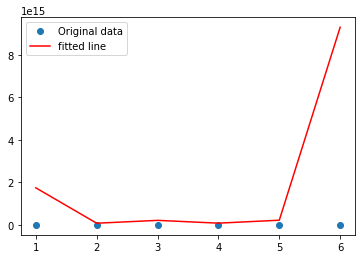

a: -56591123.472540    b: 32983994.377483


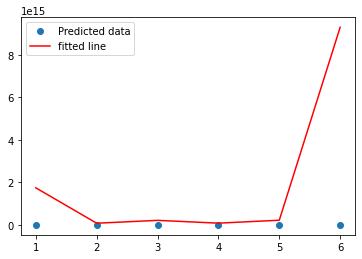

In [ ]:
%matplotlib inline
from pylab import *

import matplotlib.pyplot as plt
from scipy import stats

x = [1,2,3,4,5,6] # Here numbers represent the 6 Countries on which we are making this model
y = [52929173.910000004,2421079.506666667,6500601.63809524,2510688.6576190474,6719581.317619047,282036016.0619048]
xx = np.array(x)
yy = np.array(y)
  
# the values we care about are the first two returned by the function
b, a, r_value, p_value, std_err = stats.linregress(xx, yy)
print("a: %f    b: %f" % (a, b))

# first, let's plot the original data
plt.plot(xx, yy, 'o', label='Original data')
# now, let's plot the line we got; note that we are using the linear regression expression as the second parameter of the plot function
plt.plot(xx, a + b*yy, 'r', label='fitted line')
plt.legend()
plt.show()


# the values we care about are the first two returned by the function
b1, a1, r_value, p_value, std_err = stats.linregress(xx, yy)
print("a: %f    b: %f" % (a1, b1))
x2 = [1,2,3,4,5,6] # Again here the numbers represent the 6 Countries on which we are making this model
y2 = [52929173.90908117,2421079.505783733,6500601.637188675,2510688.65673525,6719581.316712378,282036016.0609845]
xxx = np.array(x2)
yyy = np.array(y2)
# first, let's plot the original data
plt.plot(xxx, yyy, 'o', label='Predicted data')
# now, let's plot the line we got; note that we are using the linear regression expression as the second parameter of the plot function
plt.plot(xxx, a1 + b1*yyy, 'r', label='fitted line')
plt.legend()

### Which variables made it into your model?
So the following 3 variables were considered into our model. As you can see below one indicator is selected each topic. Therefore Urban population,Nurses and midwives, and population are the variables selected in our model.

Urban population - Topic Exposure to impacts Feature ER.LND.PTLD.ZS

Nurses and midwives (per 1,000 people) - Topic Resilience Feature SH.MED.NUMW.P3

Population - Topic Size of the economy Feature SP.POP.TOTL

### Experiments

Now, we tried running the model 10 times with different variations each time, in order to check how the model behaves. We have tried using less and more predictors, removed constraints, not use activation constraints to observe some output and get some better insights what is happening in the model.


#### Increasing the predicters to 4

In [ ]:
# declare the model

model = ConcreteModel()

# Decision variables

model.a = Var(indicators, domain=Reals, bounds=(-100,100))

model.y = Var(countries, domain=Reals, bounds=(0,None), initialize=1)

model.activation = Var(indicators, domain=Binary)

# Constraints

model.constraints = ConstraintList()

# Topics constraints

t1 = 0

for t in topics:

  for i in indicator_dict[t]:

    t1 = t1 + model.activation[i]

  model.constraints.add(t1 >= 1)

t1 = 0

for t in topics:

  for i in indicator_dict[t]:

    t1 = t1 + model.activation[i]

  model.constraints.add(t1 <= 4) # Changed the value to 4 here

# Activation constraints

for i in indicators:

  model.constraints.add(model.a[i] >= -100*model.activation[i])

  model.constraints.add(model.a[i] <= 100*model.activation[i])

# Predicted value

for c in countries:

  pred_expr = 0

  for i in indicators:

    pred_expr = pred_expr + model.a[i]*var_dict[c,i]

  model.constraints.add(model.y[c] == pred_expr)  

# Declare objective

obj_expr = 0

for c in countries:

  obj_expr += ((model.y[c] - ghg[c])/1000)**2

model.error = Objective(

                      expr = obj_expr,

                      sense = minimize)

# show the model you've created
model.pprint()

# solve it
SolverFactory('bonmin', executable='/content/bonmin').solve(model).write()

# show the results

print("Objective value = ", model.error()/1000)
for t in topics:
  for i in indicator_dict[t]:
    print(t, "-","Feature",i,":",model.activation[i]())

for c in countries:
  print(c, model.y[c](), ghg[c])

4 Set Declarations
    a_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   29 : {'AG.LND.EL5M.ZS', 'AG.YLD.CREL.KG', 'BX.KLT.DINV.WD.GD.ZS', 'EG.USE.COMM.GD.PP.KD', 'EG.USE.PCAP.KG.OE', 'EN.ATM.CO2E.KT', 'EN.ATM.CO2E.PC', 'EN.ATM.CO2E.PP.GD.KD', 'EN.ATM.GHGO.KT.CE', 'EN.ATM.METH.KT.CE', 'EN.ATM.NOXE.KT.CE', 'EN.CLC.GHGR.MT.CE', 'EN.CLC.MDAT.ZS', 'EN.POP.EL5M.ZS', 'ER.LND.PTLD.ZS', 'IC.BUS.EASE.XQ', 'IS.ROD.PAVE.ZS', 'NY.GDP.MKTP.CD', 'NY.GNP.PCAP.CD', 'SE.ENR.PRSC.FM.ZS', 'SH.DYN.MORT', 'SH.H2O.SAFE.ZS', 'SH.MED.NUMW.P3', 'SH.MED.PHYS.ZS', 'SH.STA.ACSN', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.URB.GROW', 'SP.URB.TOTL'}
    activation_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   29 : {'AG.LND.EL5M.ZS', 'AG.YLD.CREL.KG', 'BX.KLT.DINV.WD.GD.ZS', 'EG.USE.COMM.GD.PP.KD', 'EG.USE.PCAP.KG.OE', 'EN.ATM.CO2E.KT', 'EN.ATM.CO2E.PC', 'EN.ATM.CO2E.PP.GD.KD

###Observations Experiment 1 

- We observe that the model selects 4 predictors when we change the limit to 4 i.e. 3 from from exposure to impacts and 1 from size of economy topic. 
- The objective value of the model is improved to 2.122 from 4.89 in the actual model.
- When we compare the actual and predicted value, there is minimal differnce between the two that takes place in decimal places. It is similar to the actual model that we ran earlier.

#### Decreasing the predictors value to 2

In [ ]:
# declare the model

model = ConcreteModel()

# Decision variables

model.a = Var(indicators, domain=Reals, bounds=(-100,100))

model.y = Var(countries, domain=Reals, bounds=(0,None), initialize=1)

model.activation = Var(indicators, domain=Binary)

# Constraints

model.constraints = ConstraintList()

# Topics constraints

t1 = 0

for t in topics:

  for i in indicator_dict[t]:

    t1 = t1 + model.activation[i]

  model.constraints.add(t1 >= 1)

t1 = 0

for t in topics:

  for i in indicator_dict[t]:

    t1 = t1 + model.activation[i]

  model.constraints.add(t1 <= 2) #we change the value to 2 here

# Activation constraints

for i in indicators:

  model.constraints.add(model.a[i] >= -100*model.activation[i])

  model.constraints.add(model.a[i] <= 100*model.activation[i])

# Predicted value

for c in countries:

  pred_expr = 0

  for i in indicators:

    pred_expr = pred_expr + model.a[i]*var_dict[c,i]

  model.constraints.add(model.y[c] == pred_expr)  

# Declare objective

obj_expr = 0

for c in countries:

  obj_expr += ((model.y[c] - ghg[c])/1000)**2

model.error = Objective(

                      expr = obj_expr,

                      sense = minimize)

# show the model you've created
model.pprint()

# solve it
SolverFactory('bonmin', executable='/content/bonmin').solve(model).write()

# show the results

print("Objective value = ", model.error()/1000)
for t in topics:
  for i in indicator_dict[t]:
    print(t, "-","Feature",i,":",model.activation[i]())

for c in countries:
  print(c, model.y[c](), ghg[c])

4 Set Declarations
    a_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   29 : {'AG.LND.EL5M.ZS', 'AG.YLD.CREL.KG', 'BX.KLT.DINV.WD.GD.ZS', 'EG.USE.COMM.GD.PP.KD', 'EG.USE.PCAP.KG.OE', 'EN.ATM.CO2E.KT', 'EN.ATM.CO2E.PC', 'EN.ATM.CO2E.PP.GD.KD', 'EN.ATM.GHGO.KT.CE', 'EN.ATM.METH.KT.CE', 'EN.ATM.NOXE.KT.CE', 'EN.CLC.GHGR.MT.CE', 'EN.CLC.MDAT.ZS', 'EN.POP.EL5M.ZS', 'ER.LND.PTLD.ZS', 'IC.BUS.EASE.XQ', 'IS.ROD.PAVE.ZS', 'NY.GDP.MKTP.CD', 'NY.GNP.PCAP.CD', 'SE.ENR.PRSC.FM.ZS', 'SH.DYN.MORT', 'SH.H2O.SAFE.ZS', 'SH.MED.NUMW.P3', 'SH.MED.PHYS.ZS', 'SH.STA.ACSN', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.URB.GROW', 'SP.URB.TOTL'}
    activation_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   29 : {'AG.LND.EL5M.ZS', 'AG.YLD.CREL.KG', 'BX.KLT.DINV.WD.GD.ZS', 'EG.USE.COMM.GD.PP.KD', 'EG.USE.PCAP.KG.OE', 'EN.ATM.CO2E.KT', 'EN.ATM.CO2E.PC', 'EN.ATM.CO2E.PP.GD.KD

###Observations Experiment 2

- We observe that the model selects 2 predictors when we change the limit to 2 i.e. 1 from from exposure to impacts and 1 from Resilience topic. 
- The objective value of the model is similar to the basic model i.e. 4.890 which was same in the actual model.
- When we compare the actual and predicted value, there is minimal differnce between the two that takes place in decimal places. It is similar to the actual model that we ran earlier.

#### Keeping only 1 indicator

In [ ]:
# declare the model

model = ConcreteModel()

# Decision variables

model.a = Var(indicators, domain=Reals, bounds=(-100,100))

model.y = Var(countries, domain=Reals, bounds=(0,None), initialize=1)

model.activation = Var(indicators, domain=Binary)

# Constraints

model.constraints = ConstraintList()

# Topics constraints

t1 = 0

for t in topics:

  for i in indicator_dict[t]:

    t1 = t1 + model.activation[i]

  model.constraints.add(t1 >= 1)

t1 = 0

for t in topics:

  for i in indicator_dict[t]:

    t1 = t1 + model.activation[i]

  model.constraints.add(t1 <= 1)

# Activation constraints

for i in indicators:

  model.constraints.add(model.a[i] >= -100*model.activation[i])

  model.constraints.add(model.a[i] <= 100*model.activation[i])

# Predicted value

for c in countries:

  pred_expr = 0

  for i in indicators:

    pred_expr = pred_expr + model.a[i]*var_dict[c,i]

  model.constraints.add(model.y[c] == pred_expr)  

# Declare objective

obj_expr = 0

for c in countries:

  obj_expr += ((model.y[c] - ghg[c])/1000)**2

model.error = Objective(

                      expr = obj_expr,

                      sense = minimize)

# show the model you've created
model.pprint()

# solve it
SolverFactory('bonmin', executable='/content/bonmin').solve(model).write()

# show the results

print("Objective value = ", model.error()/1000)
for t in topics:
  for i in indicator_dict[t]:
    print(t, "-","Feature",i,":",model.activation[i]())

for c in countries:
  print(c, model.y[c](), ghg[c])

4 Set Declarations
    a_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   29 : {'AG.LND.EL5M.ZS', 'AG.YLD.CREL.KG', 'BX.KLT.DINV.WD.GD.ZS', 'EG.USE.COMM.GD.PP.KD', 'EG.USE.PCAP.KG.OE', 'EN.ATM.CO2E.KT', 'EN.ATM.CO2E.PC', 'EN.ATM.CO2E.PP.GD.KD', 'EN.ATM.GHGO.KT.CE', 'EN.ATM.METH.KT.CE', 'EN.ATM.NOXE.KT.CE', 'EN.CLC.GHGR.MT.CE', 'EN.CLC.MDAT.ZS', 'EN.POP.EL5M.ZS', 'ER.LND.PTLD.ZS', 'IC.BUS.EASE.XQ', 'IS.ROD.PAVE.ZS', 'NY.GDP.MKTP.CD', 'NY.GNP.PCAP.CD', 'SE.ENR.PRSC.FM.ZS', 'SH.DYN.MORT', 'SH.H2O.SAFE.ZS', 'SH.MED.NUMW.P3', 'SH.MED.PHYS.ZS', 'SH.STA.ACSN', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.URB.GROW', 'SP.URB.TOTL'}
    activation_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   29 : {'AG.LND.EL5M.ZS', 'AG.YLD.CREL.KG', 'BX.KLT.DINV.WD.GD.ZS', 'EG.USE.COMM.GD.PP.KD', 'EG.USE.PCAP.KG.OE', 'EN.ATM.CO2E.KT', 'EN.ATM.CO2E.PC', 'EN.ATM.CO2E.PP.GD.KD

###Observations Experiment 3 

- This model takes the maximum time to run.
- We observe that the model selects only 1 predictor as we decreased the limit to 1 i.e. SP.URB.TOTL from exposure to impacts topic. 
- The objective value of the model is improved a little to 3.52 from 4.89 as observed in the actual model.
- When we compare the actual and predicted value, there is minimal differnce between the two that takes place in decimal places. It is similar to the actual model that we ran earlier.

#### Increasing the Indicators value to 8

In [ ]:
# declare the model

model = ConcreteModel()

# Decision variables

model.a = Var(indicators, domain=Reals, bounds=(-100,100))

model.y = Var(countries, domain=Reals, bounds=(0,None), initialize=1)

model.activation = Var(indicators, domain=Binary)

# Constraints

model.constraints = ConstraintList()

# Topics constraints

t1 = 0

for t in topics:

  for i in indicator_dict[t]:

    t1 = t1 + model.activation[i]

  model.constraints.add(t1 >= 1)

t1 = 0

for t in topics:

  for i in indicator_dict[t]:

    t1 = t1 + model.activation[i]

  model.constraints.add(t1 <= 8) # we change to 8 here

# Activation constraints

for i in indicators:

  model.constraints.add(model.a[i] >= -100*model.activation[i])

  model.constraints.add(model.a[i] <= 100*model.activation[i])

# Predicted value

for c in countries:

  pred_expr = 0

  for i in indicators:

    pred_expr = pred_expr + model.a[i]*var_dict[c,i]

  model.constraints.add(model.y[c] == pred_expr)  

# Declare objective

obj_expr = 0

for c in countries:

  obj_expr += ((model.y[c] - ghg[c])/1000)**2

model.error = Objective(

                      expr = obj_expr,

                      sense = minimize)

# show the model you've created
model.pprint()

# solve it
SolverFactory('bonmin', executable='/content/bonmin').solve(model).write()

# show the results

print("Objective value = ", model.error()/1000)
for t in topics:
  for i in indicator_dict[t]:
    print(t, "-","Feature",i,":",model.activation[i]())

for c in countries:
  print(c, model.y[c](), ghg[c])

4 Set Declarations
    a_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   29 : {'AG.LND.EL5M.ZS', 'AG.YLD.CREL.KG', 'BX.KLT.DINV.WD.GD.ZS', 'EG.USE.COMM.GD.PP.KD', 'EG.USE.PCAP.KG.OE', 'EN.ATM.CO2E.KT', 'EN.ATM.CO2E.PC', 'EN.ATM.CO2E.PP.GD.KD', 'EN.ATM.GHGO.KT.CE', 'EN.ATM.METH.KT.CE', 'EN.ATM.NOXE.KT.CE', 'EN.CLC.GHGR.MT.CE', 'EN.CLC.MDAT.ZS', 'EN.POP.EL5M.ZS', 'ER.LND.PTLD.ZS', 'IC.BUS.EASE.XQ', 'IS.ROD.PAVE.ZS', 'NY.GDP.MKTP.CD', 'NY.GNP.PCAP.CD', 'SE.ENR.PRSC.FM.ZS', 'SH.DYN.MORT', 'SH.H2O.SAFE.ZS', 'SH.MED.NUMW.P3', 'SH.MED.PHYS.ZS', 'SH.STA.ACSN', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.URB.GROW', 'SP.URB.TOTL'}
    activation_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   29 : {'AG.LND.EL5M.ZS', 'AG.YLD.CREL.KG', 'BX.KLT.DINV.WD.GD.ZS', 'EG.USE.COMM.GD.PP.KD', 'EG.USE.PCAP.KG.OE', 'EN.ATM.CO2E.KT', 'EN.ATM.CO2E.PC', 'EN.ATM.CO2E.PP.GD.KD

###Observations Experiment 4 

- We observe that the model selects 8 variables as we increase the limit to 8 i.e. S4 from exposure to impacts topic, 2 from Rsilience, and 2 from Size of the economy. 
- The objective value of the model is deteriorated a little to 4.896 from 4.890 as observed in the actual model.
- When we compare the actual and predicted value, there is minimal differnce between the two that takes place in decimal places. It is similar to the actual model that we ran earlier.

#### Removing the coefficient bounds (coefficients that fall between -100 and 100)

In [ ]:
# declare the model

model = ConcreteModel()

# Decision variables

model.a = Var(indicators, domain=Reals, bounds=(-100,100))

model.y = Var(countries, domain=Reals, bounds=(0,None), initialize=1)

model.activation = Var(indicators, domain=Binary)

# Constraints

model.constraints = ConstraintList()

# Topics constraints

t1 = 0

for t in topics:

  for i in indicator_dict[t]:

    t1 = t1 + model.activation[i]

  model.constraints.add(t1 >= 1)

t1 = 0

for t in topics:

  for i in indicator_dict[t]:

    t1 = t1 + model.activation[i]

  model.constraints.add(t1 <= 3)

# Not Including Activation constraints here
"""
for i in indicators:

  model.constraints.add(model.a[i] >= -100*model.activation[i])

  model.constraints.add(model.a[i] <= 100*model.activation[i])

"""

# Predicted value

for c in countries:

  pred_expr = 0

  for i in indicators:

    pred_expr = pred_expr + model.a[i]*var_dict[c,i]

  model.constraints.add(model.y[c] == pred_expr)  

# Declare objective

obj_expr = 0

for c in countries:

  obj_expr += ((model.y[c] - ghg[c])/1000)**2

model.error = Objective(

                      expr = obj_expr,

                      sense = minimize)

# show the model you've created
model.pprint()

# solve it
SolverFactory('bonmin', executable='/content/bonmin').solve(model).write()

# show the results

print("Objective value = ", model.error()/1000)
for t in topics:
  for i in indicator_dict[t]:
    print(t, "-","Feature",i,":",model.activation[i]())

for c in countries:
  print(c, model.y[c](), ghg[c])

4 Set Declarations
    a_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   29 : {'AG.LND.EL5M.ZS', 'AG.YLD.CREL.KG', 'BX.KLT.DINV.WD.GD.ZS', 'EG.USE.COMM.GD.PP.KD', 'EG.USE.PCAP.KG.OE', 'EN.ATM.CO2E.KT', 'EN.ATM.CO2E.PC', 'EN.ATM.CO2E.PP.GD.KD', 'EN.ATM.GHGO.KT.CE', 'EN.ATM.METH.KT.CE', 'EN.ATM.NOXE.KT.CE', 'EN.CLC.GHGR.MT.CE', 'EN.CLC.MDAT.ZS', 'EN.POP.EL5M.ZS', 'ER.LND.PTLD.ZS', 'IC.BUS.EASE.XQ', 'IS.ROD.PAVE.ZS', 'NY.GDP.MKTP.CD', 'NY.GNP.PCAP.CD', 'SE.ENR.PRSC.FM.ZS', 'SH.DYN.MORT', 'SH.H2O.SAFE.ZS', 'SH.MED.NUMW.P3', 'SH.MED.PHYS.ZS', 'SH.STA.ACSN', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.URB.GROW', 'SP.URB.TOTL'}
    activation_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   29 : {'AG.LND.EL5M.ZS', 'AG.YLD.CREL.KG', 'BX.KLT.DINV.WD.GD.ZS', 'EG.USE.COMM.GD.PP.KD', 'EG.USE.PCAP.KG.OE', 'EN.ATM.CO2E.KT', 'EN.ATM.CO2E.PC', 'EN.ATM.CO2E.PP.GD.KD

###Observations Experiment 5 

- When we remove the coefficient bounds, we see that the model selects only 1 predictor in output ie. Exposure to impacts - Feature AG.LND.EL5M.ZS as it coniders the first optimal value in the list straightaway.
- The objective value of the model is improved a little to 4.336 from 4.890 as observed in the actual model.
- When we compare the actual and predicted value, there is minimal differnce between the two that takes place in decimal places. It is similar to the actual model that we ran earlier.

#### Increasing the Indicators value to 20

In [ ]:
# declare the model

model = ConcreteModel()

# Decision variables

model.a = Var(indicators, domain=Reals, bounds=(-100,100))

model.y = Var(countries, domain=Reals, bounds=(0,None), initialize=1)

model.activation = Var(indicators, domain=Binary)

# Constraints

model.constraints = ConstraintList()

# Topics constraints

t1 = 0

for t in topics:

  for i in indicator_dict[t]:

    t1 = t1 + model.activation[i]

  model.constraints.add(t1 >= 1)

t1 = 0

for t in topics:

  for i in indicator_dict[t]:

    t1 = t1 + model.activation[i]

  model.constraints.add(t1 <= 20) #changing value to 20

# Activation constraints

for i in indicators:

  model.constraints.add(model.a[i] >= -100*model.activation[i])

  model.constraints.add(model.a[i] <= 100*model.activation[i])

# Predicted value

for c in countries:

  pred_expr = 0

  for i in indicators:

    pred_expr = pred_expr + model.a[i]*var_dict[c,i]

  model.constraints.add(model.y[c] == pred_expr)  

# Declare objective

obj_expr = 0

for c in countries:

  obj_expr += ((model.y[c] - ghg[c])/1000)**2

model.error = Objective(

                      expr = obj_expr,

                      sense = minimize)

# show the model you've created
model.pprint()

# solve it
SolverFactory('bonmin', executable='/content/bonmin').solve(model).write()

# show the results

print("Objective value = ", model.error()/1000)
for t in topics:
  for i in indicator_dict[t]:
    print(t, "-","Feature",i,":",model.activation[i]())

for c in countries:
  print(c, model.y[c](), ghg[c])

4 Set Declarations
    a_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   29 : {'AG.LND.EL5M.ZS', 'AG.YLD.CREL.KG', 'BX.KLT.DINV.WD.GD.ZS', 'EG.USE.COMM.GD.PP.KD', 'EG.USE.PCAP.KG.OE', 'EN.ATM.CO2E.KT', 'EN.ATM.CO2E.PC', 'EN.ATM.CO2E.PP.GD.KD', 'EN.ATM.GHGO.KT.CE', 'EN.ATM.METH.KT.CE', 'EN.ATM.NOXE.KT.CE', 'EN.CLC.GHGR.MT.CE', 'EN.CLC.MDAT.ZS', 'EN.POP.EL5M.ZS', 'ER.LND.PTLD.ZS', 'IC.BUS.EASE.XQ', 'IS.ROD.PAVE.ZS', 'NY.GDP.MKTP.CD', 'NY.GNP.PCAP.CD', 'SE.ENR.PRSC.FM.ZS', 'SH.DYN.MORT', 'SH.H2O.SAFE.ZS', 'SH.MED.NUMW.P3', 'SH.MED.PHYS.ZS', 'SH.STA.ACSN', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.URB.GROW', 'SP.URB.TOTL'}
    activation_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   29 : {'AG.LND.EL5M.ZS', 'AG.YLD.CREL.KG', 'BX.KLT.DINV.WD.GD.ZS', 'EG.USE.COMM.GD.PP.KD', 'EG.USE.PCAP.KG.OE', 'EN.ATM.CO2E.KT', 'EN.ATM.CO2E.PC', 'EN.ATM.CO2E.PP.GD.KD

###Observations Experiment 6 

- We tried experimenting with the predictor limit in order to see if the model selects all the 20 variables. Therefore,we observe that the model selects all the 20 variables when we set the limit to 20. 
- The objective value of the model is improved a lot to 2.122 from 4.890 as observed in the actual model. By far this is the best objective function value observed that was also observed in the experiment 1.
- When we compare the actual and predicted value, there is minimal differnce between the two that takes place in decimal places. It is similar to the actual model that we ran earlier.

#### Changing the coefficient bounds ( -2500 to 2500)

In [ ]:
# declare the model

model = ConcreteModel()

# Decision variables

model.a = Var(indicators, domain=Reals, bounds=(-2500,2500)) #increasing coefficient bounds significantly

model.y = Var(countries, domain=Reals, bounds=(0,None), initialize=1)

model.activation = Var(indicators, domain=Binary)

# Constraints

model.constraints = ConstraintList()

# Topics constraints

t1 = 0

for t in topics:

  for i in indicator_dict[t]:

    t1 = t1 + model.activation[i]

  model.constraints.add(t1 >= 1)

t1 = 0

for t in topics:

  for i in indicator_dict[t]:

    t1 = t1 + model.activation[i]

  model.constraints.add(t1 <= 3)

# Activation constraints

for i in indicators:

  model.constraints.add(model.a[i] >= -2500*model.activation[i])

  model.constraints.add(model.a[i] <= 2500*model.activation[i])

# Predicted value

for c in countries:

  pred_expr = 0

  for i in indicators:

    pred_expr = pred_expr + model.a[i]*var_dict[c,i]

  model.constraints.add(model.y[c] == pred_expr)  

# Declare objective

obj_expr = 0

for c in countries:

  obj_expr += ((model.y[c] - ghg[c])/1000)**2

model.error = Objective(

                      expr = obj_expr,

                      sense = minimize)

# show the model you've created
model.pprint()

# solve it
SolverFactory('bonmin', executable='/content/bonmin').solve(model).write()

# show the results

print("Objective value = ", model.error()/1000)
for t in topics:
  for i in indicator_dict[t]:
    print(t, "-","Feature",i,":",model.activation[i]())

for c in countries:
  print(c, model.y[c](), ghg[c])

4 Set Declarations
    a_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   29 : {'AG.LND.EL5M.ZS', 'AG.YLD.CREL.KG', 'BX.KLT.DINV.WD.GD.ZS', 'EG.USE.COMM.GD.PP.KD', 'EG.USE.PCAP.KG.OE', 'EN.ATM.CO2E.KT', 'EN.ATM.CO2E.PC', 'EN.ATM.CO2E.PP.GD.KD', 'EN.ATM.GHGO.KT.CE', 'EN.ATM.METH.KT.CE', 'EN.ATM.NOXE.KT.CE', 'EN.CLC.GHGR.MT.CE', 'EN.CLC.MDAT.ZS', 'EN.POP.EL5M.ZS', 'ER.LND.PTLD.ZS', 'IC.BUS.EASE.XQ', 'IS.ROD.PAVE.ZS', 'NY.GDP.MKTP.CD', 'NY.GNP.PCAP.CD', 'SE.ENR.PRSC.FM.ZS', 'SH.DYN.MORT', 'SH.H2O.SAFE.ZS', 'SH.MED.NUMW.P3', 'SH.MED.PHYS.ZS', 'SH.STA.ACSN', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.URB.GROW', 'SP.URB.TOTL'}
    activation_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   29 : {'AG.LND.EL5M.ZS', 'AG.YLD.CREL.KG', 'BX.KLT.DINV.WD.GD.ZS', 'EG.USE.COMM.GD.PP.KD', 'EG.USE.PCAP.KG.OE', 'EN.ATM.CO2E.KT', 'EN.ATM.CO2E.PC', 'EN.ATM.CO2E.PP.GD.KD

###Observations Experiment 7 

- So we tried increasing the coefficient bounds significantly, i.e. -2500 and 2500 to observe how the model behaves. As we can see that the model selects 3 variables 1 from Exposure to Impacts, and 2 from Resilience. 
- The objective value of the model is improved significantly to  1.35742 taht is great improvement from 4.890 that was seen in the actual model.
- When we compare the actual and predicted value, there is minimal differnce between the two that takes place in decimal places. It is similar to the actual model that we ran earlier.

#### Changing the coefficient bounds (-100 to 5)

In [ ]:
# declare the model

model = ConcreteModel()

# Decision variables

model.a = Var(indicators, domain=Reals, bounds=(-100,5)) #changing the bounds here

model.y = Var(countries, domain=Reals, bounds=(0,None), initialize=1)

model.activation = Var(indicators, domain=Binary)

# Constraints

model.constraints = ConstraintList()

# Topics constraints

t1 = 0

for t in topics:

  for i in indicator_dict[t]:

    t1 = t1 + model.activation[i]

  model.constraints.add(t1 >= 1)

t1 = 0

for t in topics:

  for i in indicator_dict[t]:

    t1 = t1 + model.activation[i]

  model.constraints.add(t1 <= 3)

# Activation constraints

for i in indicators:

  model.constraints.add(model.a[i] >= -100*model.activation[i])

  model.constraints.add(model.a[i] <= 5*model.activation[i])

# Predicted value

for c in countries:

  pred_expr = 0

  for i in indicators:

    pred_expr = pred_expr + model.a[i]*var_dict[c,i]

  model.constraints.add(model.y[c] == pred_expr)  

# Declare objective

obj_expr = 0

for c in countries:

  obj_expr += ((model.y[c] - ghg[c])/1000)**2

model.error = Objective(

                      expr = obj_expr,

                      sense = minimize)

# show the model you've created
model.pprint()

# solve it
SolverFactory('bonmin', executable='/content/bonmin').solve(model).write()

# show the results

print("Objective value = ", model.error()/1000)
for t in topics:
  for i in indicator_dict[t]:
    print(t, "-","Feature",i,":",model.activation[i]())

for c in countries:
  print(c, model.y[c](), ghg[c])

4 Set Declarations
    a_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   29 : {'AG.LND.EL5M.ZS', 'AG.YLD.CREL.KG', 'BX.KLT.DINV.WD.GD.ZS', 'EG.USE.COMM.GD.PP.KD', 'EG.USE.PCAP.KG.OE', 'EN.ATM.CO2E.KT', 'EN.ATM.CO2E.PC', 'EN.ATM.CO2E.PP.GD.KD', 'EN.ATM.GHGO.KT.CE', 'EN.ATM.METH.KT.CE', 'EN.ATM.NOXE.KT.CE', 'EN.CLC.GHGR.MT.CE', 'EN.CLC.MDAT.ZS', 'EN.POP.EL5M.ZS', 'ER.LND.PTLD.ZS', 'IC.BUS.EASE.XQ', 'IS.ROD.PAVE.ZS', 'NY.GDP.MKTP.CD', 'NY.GNP.PCAP.CD', 'SE.ENR.PRSC.FM.ZS', 'SH.DYN.MORT', 'SH.H2O.SAFE.ZS', 'SH.MED.NUMW.P3', 'SH.MED.PHYS.ZS', 'SH.STA.ACSN', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.URB.GROW', 'SP.URB.TOTL'}
    activation_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   29 : {'AG.LND.EL5M.ZS', 'AG.YLD.CREL.KG', 'BX.KLT.DINV.WD.GD.ZS', 'EG.USE.COMM.GD.PP.KD', 'EG.USE.PCAP.KG.OE', 'EN.ATM.CO2E.KT', 'EN.ATM.CO2E.PC', 'EN.ATM.CO2E.PP.GD.KD

###Observations Experiment 8 

- So we tried changing the coefficient bounds , i.e. -100 and 5 to observe how the model behaves. As we can see that the model selects 3 variables-> 1 from Exposure to Impacts, 1 from Resilience, and 1 from Size of the Economy. This model behaves kind of similar to the original model that we made. 
- The objective value of the model is improved a lot to  2.870 that is great improvement from 4.890 that was seen in the actual model.
- When we compare the actual and predicted value, there is minimal differnce between the two that takes place in decimal places. It is similar to the actual model that we ran earlier.

#### Changing the coefficient bounds ( 0 to 100)

In [ ]:
# declare the model

model = ConcreteModel()

# Decision variables

model.a = Var(indicators, domain=Reals, bounds=(0,100)) #changing bounds here

model.y = Var(countries, domain=Reals, bounds=(0,None), initialize=1)

model.activation = Var(indicators, domain=Binary)

# Constraints

model.constraints = ConstraintList()

# Topics constraints

t1 = 0

for t in topics:

  for i in indicator_dict[t]:

    t1 = t1 + model.activation[i]

  model.constraints.add(t1 >= 1)

t1 = 0

for t in topics:

  for i in indicator_dict[t]:

    t1 = t1 + model.activation[i]

  model.constraints.add(t1 <= 3)

# Activation constraints

for i in indicators:

  model.constraints.add(model.a[i] >= 0*model.activation[i])

  model.constraints.add(model.a[i] <= 100*model.activation[i])

# Predicted value

for c in countries:

  pred_expr = 0

  for i in indicators:

    pred_expr = pred_expr + model.a[i]*var_dict[c,i]

  model.constraints.add(model.y[c] == pred_expr)  

# Declare objective

obj_expr = 0

for c in countries:

  obj_expr += ((model.y[c] - ghg[c])/1000)**2

model.error = Objective(

                      expr = obj_expr,

                      sense = minimize)

# show the model you've created
model.pprint()

# solve it
SolverFactory('bonmin', executable='/content/bonmin').solve(model).write()

# show the results

print("Objective value = ", model.error()/1000)
for t in topics:
  for i in indicator_dict[t]:
    print(t, "-","Feature",i,":",model.activation[i]())

for c in countries:
  print(c, model.y[c](), ghg[c])

4 Set Declarations
    a_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   29 : {'AG.LND.EL5M.ZS', 'AG.YLD.CREL.KG', 'BX.KLT.DINV.WD.GD.ZS', 'EG.USE.COMM.GD.PP.KD', 'EG.USE.PCAP.KG.OE', 'EN.ATM.CO2E.KT', 'EN.ATM.CO2E.PC', 'EN.ATM.CO2E.PP.GD.KD', 'EN.ATM.GHGO.KT.CE', 'EN.ATM.METH.KT.CE', 'EN.ATM.NOXE.KT.CE', 'EN.CLC.GHGR.MT.CE', 'EN.CLC.MDAT.ZS', 'EN.POP.EL5M.ZS', 'ER.LND.PTLD.ZS', 'IC.BUS.EASE.XQ', 'IS.ROD.PAVE.ZS', 'NY.GDP.MKTP.CD', 'NY.GNP.PCAP.CD', 'SE.ENR.PRSC.FM.ZS', 'SH.DYN.MORT', 'SH.H2O.SAFE.ZS', 'SH.MED.NUMW.P3', 'SH.MED.PHYS.ZS', 'SH.STA.ACSN', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.URB.GROW', 'SP.URB.TOTL'}
    activation_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   29 : {'AG.LND.EL5M.ZS', 'AG.YLD.CREL.KG', 'BX.KLT.DINV.WD.GD.ZS', 'EG.USE.COMM.GD.PP.KD', 'EG.USE.PCAP.KG.OE', 'EN.ATM.CO2E.KT', 'EN.ATM.CO2E.PC', 'EN.ATM.CO2E.PP.GD.KD

###Observations Experiment 9 

- So we tried changing the coefficient bounds , i.e. 0 and 100 to observe how the model behaves. We see that the model selects 2 variables from the model even though we gave the limit till 3-> 1 from Exposure to Impacts, , and 1 from 
- The objective value of the model is significantly to  1.250 that is great improvement from 4.890 that was seen in the actual model and by far the best model to choose.
- When we compare the actual and predicted value, there is minimal differnce between the two that takes place in decimal places. It is similar to the actual model that we ran earlier.

#### Not dividing the model error by 1000 in the objective function

In [ ]:
# declare the model

model = ConcreteModel()

# Decision variables

model.a = Var(indicators, domain=Reals, bounds=(-100,100))

model.y = Var(countries, domain=Reals, bounds=(0,None), initialize=1)

model.activation = Var(indicators, domain=Binary)

# Constraints

model.constraints = ConstraintList()

# Topics constraints

t1 = 0

for t in topics:

  for i in indicator_dict[t]:

    t1 = t1 + model.activation[i]

  model.constraints.add(t1 >= 1)

t1 = 0

for t in topics:

  for i in indicator_dict[t]:

    t1 = t1 + model.activation[i]

  model.constraints.add(t1 <= 3)

# Activation constraints

for i in indicators:

  model.constraints.add(model.a[i] >= -100*model.activation[i])

  model.constraints.add(model.a[i] <= 100*model.activation[i])

# Predicted value

for c in countries:

  pred_expr = 0

  for i in indicators:

    pred_expr = pred_expr + model.a[i]*var_dict[c,i]

  model.constraints.add(model.y[c] == pred_expr)  

# Declare objective

obj_expr = 0

for c in countries:

  obj_expr += ((model.y[c] - ghg[c]))**2  #not dividing the error by 1000 here

model.error = Objective(

                      expr = obj_expr,

                      sense = minimize)

# show the model you've created
model.pprint()

# solve it
SolverFactory('bonmin', executable='/content/bonmin').solve(model).write()

# show the results

print("Objective value = ", model.error())
for t in topics:
  for i in indicator_dict[t]:
    print(t, "-","Feature",i,":",model.activation[i]())

for c in countries:
  print(c, model.y[c](), ghg[c])

4 Set Declarations
    a_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   29 : {'AG.LND.EL5M.ZS', 'AG.YLD.CREL.KG', 'BX.KLT.DINV.WD.GD.ZS', 'EG.USE.COMM.GD.PP.KD', 'EG.USE.PCAP.KG.OE', 'EN.ATM.CO2E.KT', 'EN.ATM.CO2E.PC', 'EN.ATM.CO2E.PP.GD.KD', 'EN.ATM.GHGO.KT.CE', 'EN.ATM.METH.KT.CE', 'EN.ATM.NOXE.KT.CE', 'EN.CLC.GHGR.MT.CE', 'EN.CLC.MDAT.ZS', 'EN.POP.EL5M.ZS', 'ER.LND.PTLD.ZS', 'IC.BUS.EASE.XQ', 'IS.ROD.PAVE.ZS', 'NY.GDP.MKTP.CD', 'NY.GNP.PCAP.CD', 'SE.ENR.PRSC.FM.ZS', 'SH.DYN.MORT', 'SH.H2O.SAFE.ZS', 'SH.MED.NUMW.P3', 'SH.MED.PHYS.ZS', 'SH.STA.ACSN', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.URB.GROW', 'SP.URB.TOTL'}
    activation_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   29 : {'AG.LND.EL5M.ZS', 'AG.YLD.CREL.KG', 'BX.KLT.DINV.WD.GD.ZS', 'EG.USE.COMM.GD.PP.KD', 'EG.USE.PCAP.KG.OE', 'EN.ATM.CO2E.KT', 'EN.ATM.CO2E.PC', 'EN.ATM.CO2E.PP.GD.KD

###Observations Experiment 10 

- So we didn't divide the model error by 1000 to observe how the model behaves in the outputs. As we can see that the model selects 3 variables-> 1 from Exposure to Impacts, 1 from Resilience, and 1 from Size of the Economy. This model behaves kind of similar to the original model that we made. 
- The objective value of the model is giving 0 output. This means that diving the objective function by 1000 gives better nuances of the errors and how the model actually behaves. We can't judge or discern this model properly in different iterations if we don't divide this model's objective function by 1000.
- When we compare the actual and predicted value, there is literally no difference even in the decimal values.

## Conclusions

- We will choose the Experiment 8 model in which we have the coefficients bounds set 0 to 100 and it has the best performance, giving us the lowest value for the objective function. Also, we will recommend using the Experiment 6 model which has a coefficient bounds range of -2500 to 2500, as it gives equally good results with minimum error.

- The Experiment 3 model, having 8 predictors had the worst performance, which is almost similar to the original model having 3 predictors.

- In the output we observed that Exposure to Impacts is the most chosen topic for the models whereas Size of economy stays the least favorable when it comes to choosing predictors/indicators for the models. 

- Real world datasets are initially hard to interpret and work upon. Working on this project, we learned different ways of visualizing and understanding the complex datasets that will help us a lot in future projects.

- Using the linear regression optimization model for sustainability is a brilliant way to solve this problem as there are multiple factors/variables that need to be considered while solving such complex models and using optimization in the linear/logistic regression helps solve the problem better, also giving easily interpretable results. When we see this project, there were several numerical features. Optimization helped us identify those values/parameters better and gave us better results because applying simple regression had issues with overfitting.

- While working on the real world problems, constraints are a major part of the projects. Using optimization with linear regression, we can easily apply and play around with these constraints, giving us the best possible results.

- For future research, we can try integrating a dataset that involves the emissions from different sources such as Fossil fuels and emissions from the Food industry such as Meat, Beef etc.



